### Import dependencies:

In [1]:
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

### find_bbox function:
Takes a mask image as input and returns related bouding box coordinates.

In [2]:
def find_bbox(img, margin):
    im_width, im_height = img.shape
    row_indices = np.nonzero(img == 255)
    ymin, xmin = np.min(row_indices, axis=1)
    ymax, xmax = np.max(row_indices, axis=1)
    
    xmin = (xmin-margin) if(xmin-margin>0) else 0
    ymin = (ymin-margin) if(ymin-margin>0) else 0
    xmax = (xmax+margin) if(xmax+margin<im_height-1) else im_height-1
    ymax = (ymax+margin) if(ymax+margin<im_width-1) else im_width-1
    return (xmin, ymin, xmax, ymax)

### Main body:

In [3]:
pred_train_mask_path = "outputs/test_masks_2017-09-20-1323/{}.gif"
df_train = pd.read_csv('inputs/sample_submission.csv')
#df_train = pd.read_csv('inputs/train_bboxes_ex2.csv')
#df_train = pd.read_csv('inputs/valid_images_ex3.csv')
ids_train = df_train['img'].map(lambda s: s.split('.')[0])

In [6]:
num = 1
margin = 30
bboxes = []
for id in ids_train:
    img_path = pred_train_mask_path.format(id)
    img_origin = np.array(Image.open(img_path).convert('L'))
    xmin, ymin, xmax, ymax = find_bbox(img_origin, margin)
    
    bboxes.append([id, xmin, ymin, xmax, ymax])
    
    if num%500 == 0:
        print('{0}/{1}'.format(num, len(ids_train)))
    num += 1
    
np.savetxt('inputs/test_bbox.csv', bboxes, fmt='%s', delimiter=',', newline='\n')
print('Done')

500/100064
1000/100064
1500/100064
2000/100064
2500/100064
3000/100064
3500/100064
4000/100064
4500/100064
5000/100064
5500/100064
6000/100064
6500/100064
7000/100064
7500/100064
8000/100064
8500/100064
9000/100064
9500/100064
10000/100064
10500/100064
11000/100064
11500/100064
12000/100064
12500/100064
13000/100064
13500/100064
14000/100064
14500/100064
15000/100064
15500/100064
16000/100064
16500/100064
17000/100064
17500/100064
18000/100064
18500/100064
19000/100064
19500/100064
20000/100064
20500/100064
21000/100064
21500/100064
22000/100064
22500/100064
23000/100064
23500/100064
24000/100064
24500/100064
25000/100064
25500/100064
26000/100064
26500/100064
27000/100064
27500/100064
28000/100064
28500/100064
29000/100064
29500/100064
30000/100064
30500/100064
31000/100064
31500/100064
32000/100064
32500/100064
33000/100064
33500/100064
34000/100064
34500/100064
35000/100064
35500/100064
36000/100064
36500/100064
37000/100064
37500/100064
38000/100064
38500/100064
39000/100064
39500/

## Compare predicted contours with precise contours (obtain from mask gtoundtruth)

In [7]:
from utilities import utils_masks
import cv2

Using TensorFlow backend.


In [9]:
bbox_file_path = 'inputs/train_bboxes.csv'
pred_bbox_mask_path = "outputs/pred_train_bboxes/{}.jpg"
imgs_path = "inputs/train/{}.jpg"
bb = utils_masks.get_bboxes(bbox_file_path)
for id in ids_train:
    im = cv2.imread(imgs_path.format(id))
    xmin, ymin, xmax, ymax = bb[id]
    cropped_im = im[ymin:ymax+1, xmin:xmax+1]
    cv2.imwrite(pred_bbox_mask_path.format(id), cropped_im)

In [10]:
im_width = 1918
im_height = 1280

1918 1280


In [15]:
precise_bboxes = utils_masks.get_bboxes('inputs/Old_Bboxes/train_bbox.csv')

In [16]:
approx_bboxes = utils_masks.get_bboxes('inputs/train_bboxes.csv')

In [13]:
def bb_intersection_over_union(boxA, boxB):
    # determine the (x, y)-coordinates of the intersection rectangle
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[2], boxB[2])
    yB = min(boxA[3], boxB[3])
 
    # compute the area of intersection rectangle
    interArea = (xB - xA + 1) * (yB - yA + 1)
 
    # compute the area of both the prediction and ground-truth
    # rectangles
    boxAArea = (boxA[2] - boxA[0] + 1) * (boxA[3] - boxA[1] + 1)
    boxBArea = (boxB[2] - boxB[0] + 1) * (boxB[3] - boxB[1] + 1)
 
    # compute the intersection over union by taking the intersection
    # area and dividing it by the sum of prediction + ground-truth
    # areas - the interesection area
    iou = interArea / float(boxAArea + boxBArea - interArea)
 
    # return the intersection over union value
    return iou

In [17]:
IOU = []
for id in ids_train.values:
    boxA = precise_bboxes[id]
    boxB = approx_bboxes[id]
    IOU.append(bb_intersection_over_union(boxA, boxB))

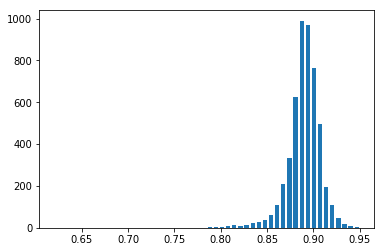

In [18]:
#plt.hist(IOU)
hist, bins = np.histogram(IOU, bins=50)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.show()

In [23]:
indices =( np.array(IOU) < 0.7 )

In [24]:
idx = np.where(indices == True)
print idx
print np.shape(idx)[1]

(array([2031, 3431, 4968]),)
3


### Provide a integer number for id_image & see related bounding box. 

69915dab0755_16 32 29 120 113


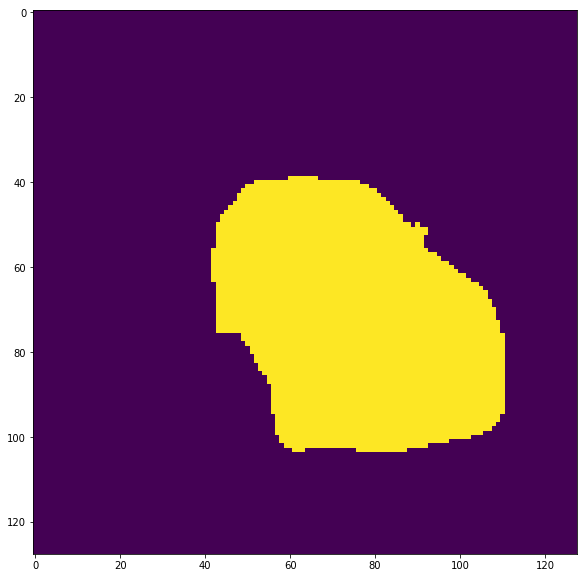

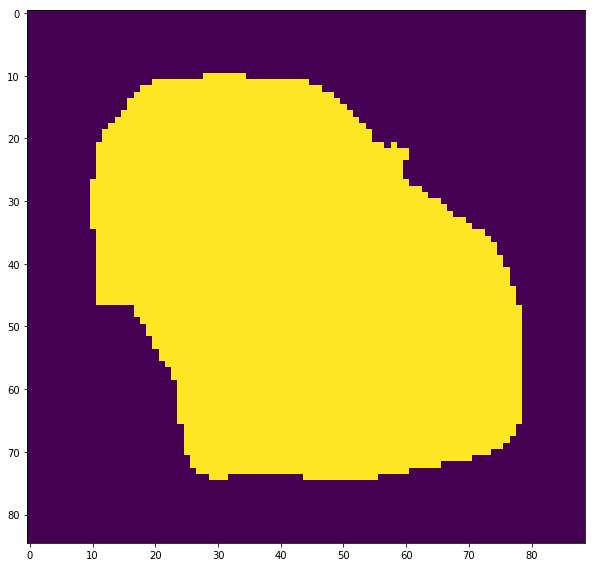

In [16]:
id_img = 0

plt.figure(figsize=(10, 10))
im = np.array(Image.open(train_mask_path.format(ids_train[id_img])).convert('L'))
plt.imshow(im)
xmin, ymin, xmax, ymax = find_bbox(im, 10)
print ids_train[id_img], xmin, ymin, xmax, ymax
cropped_im = im[ymin:ymax+1, xmin:xmax+1]
plt.figure(figsize=(10, 10))
plt.imshow(cropped_im)
#rect = plt.Rectangle((xmin, ymin), (xmax-xmin), (ymax-ymin), fill=False, color='red')
#plt.axes().add_patch(rect)
#plt.show()